# Seaborn

### Setup: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# %matplotlib inline
%reload_ext autoreload
%autoreload 2

### Importing Data

In [2]:
cs_df = pd.read_csv('data/Iris.csv')
cs_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Built-in Datasets

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution Plots

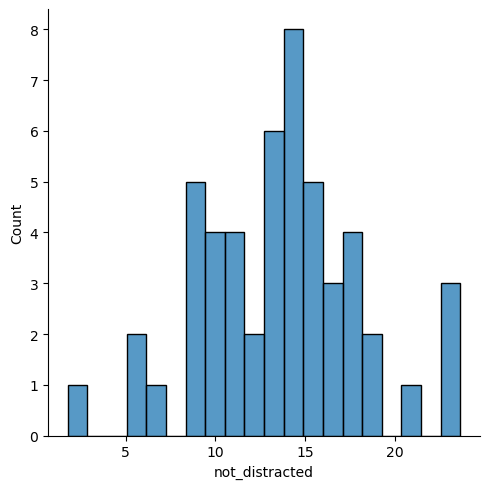

In [5]:
sns.displot(crash_df['not_distracted'], kde=False, bins=20)

### Joint Plots

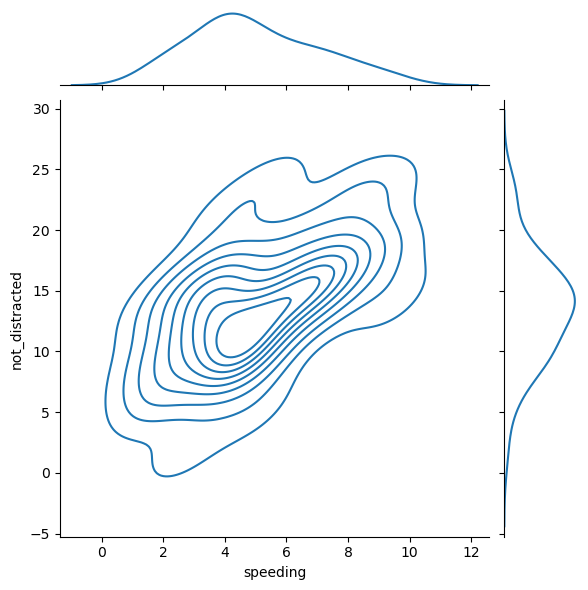

In [6]:
sns.jointplot(x='speeding', y='not_distracted', data=crash_df, kind='kde')
#kind='hex', 'kind='reg', 'kind='scatter', 'kind='hist'

### KDE Plot

<Axes: xlabel='alcohol', ylabel='Density'>

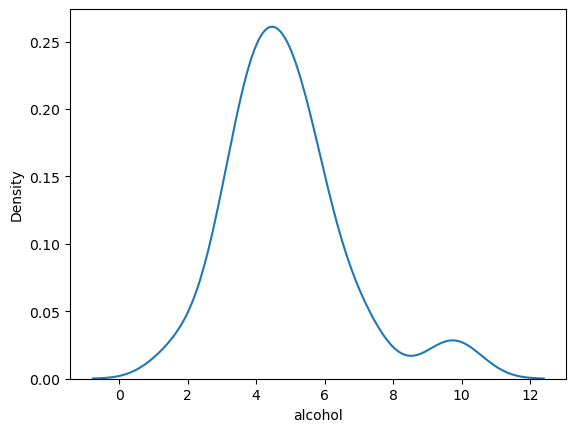

In [7]:
sns.kdeplot(crash_df['alcohol'])

### Pair Plot

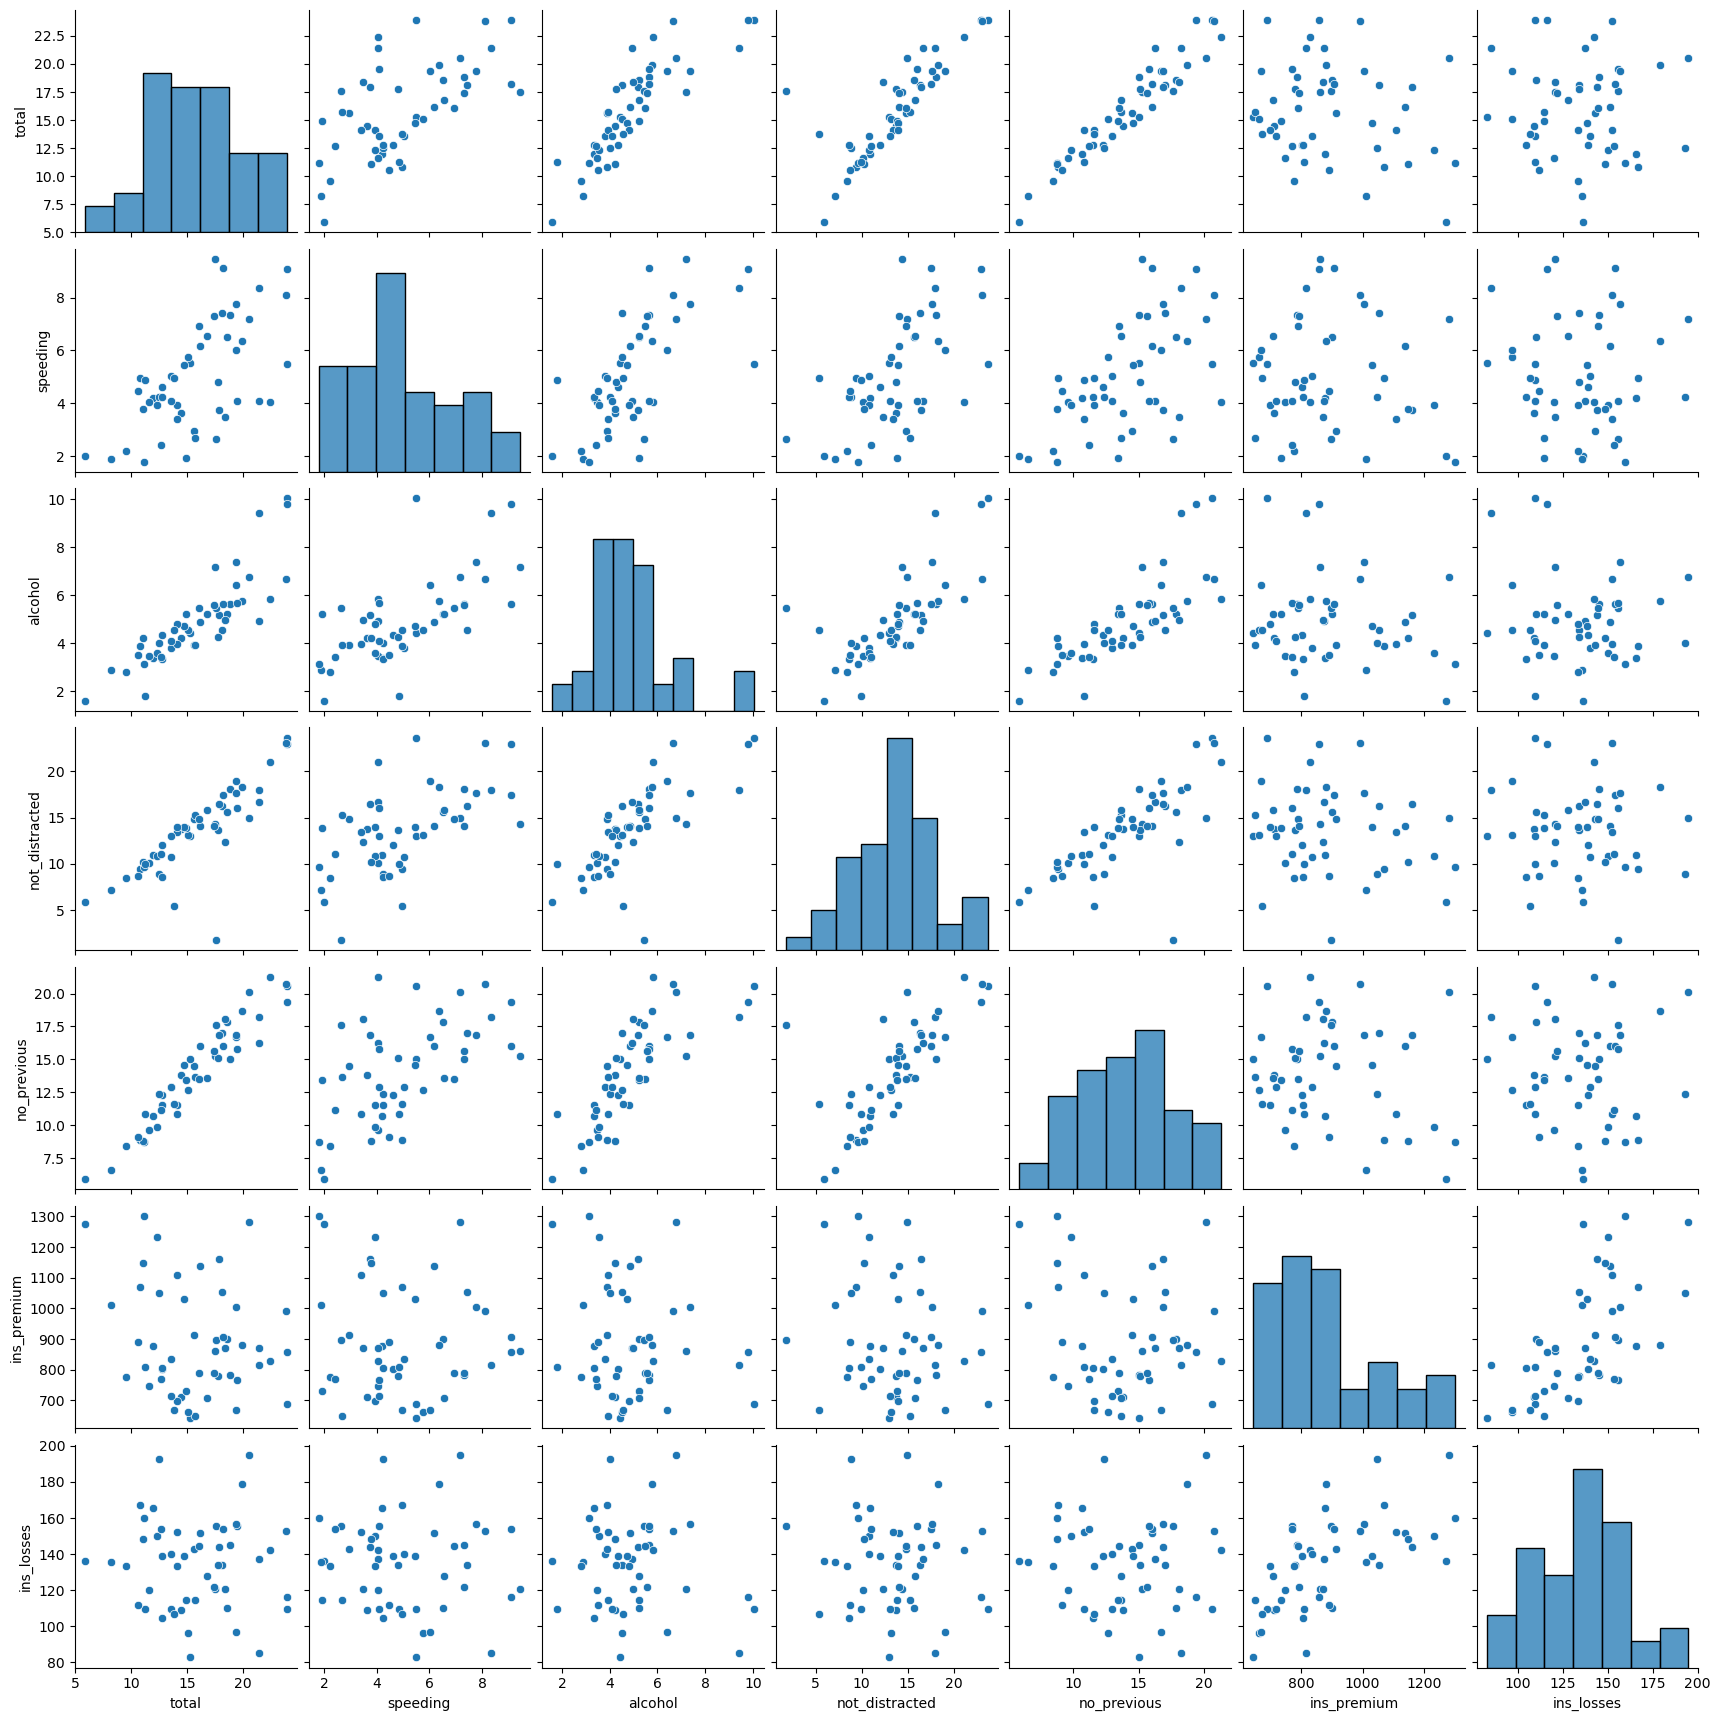

In [8]:
sns.pairplot(crash_df)

In [9]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


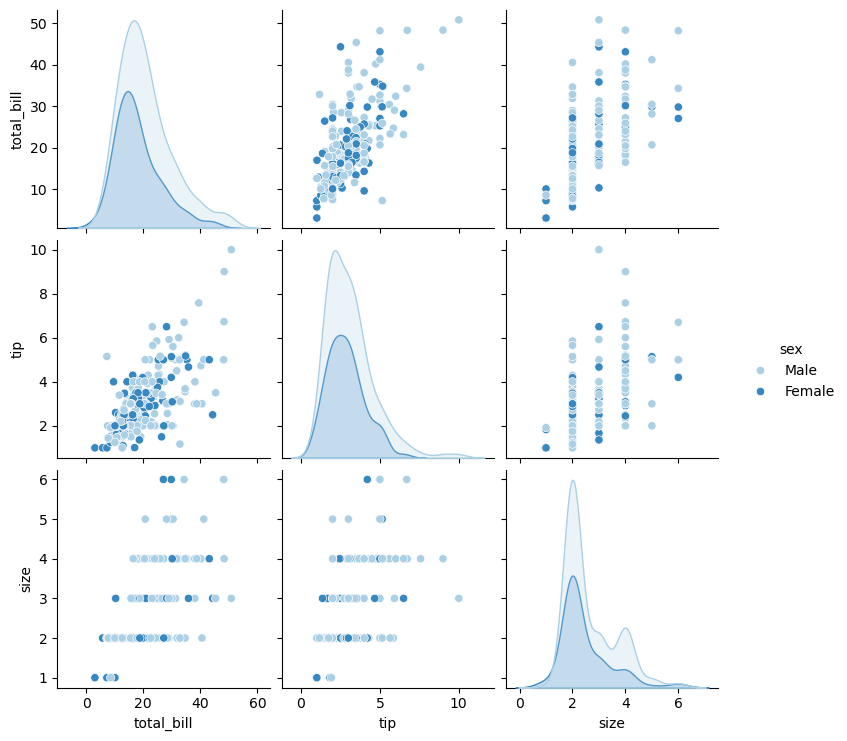

In [10]:
sns.pairplot(tips_df, hue='sex', palette='Blues')

### Rug Plot

<Axes: xlabel='tip'>

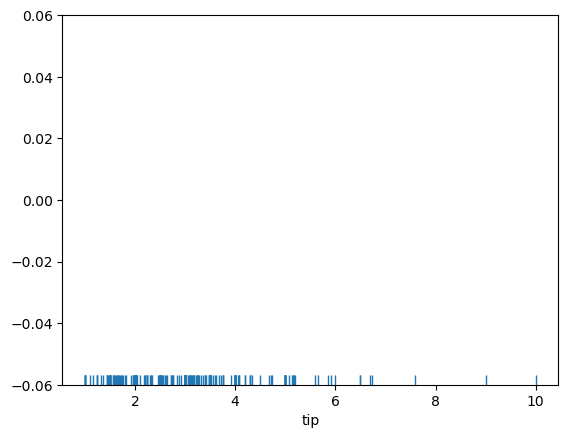

In [11]:
sns.rugplot(tips_df['tip'])

### Styling

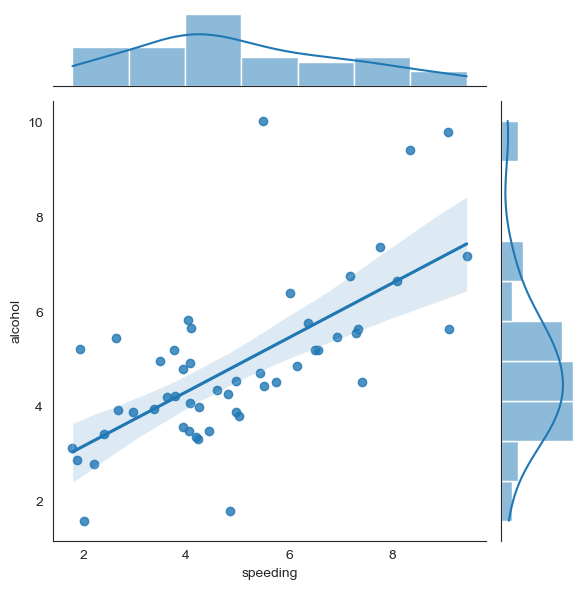

<Figure size 800x400 with 0 Axes>

In [12]:
sns.set_style('white')
# sns.set_style('dark')
# sns.set_style('darkgrid')
# sns.set_style('ticks')
# sns.set_style('whitegrid')

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Let's say you want to size of this plot
plt.figure(figsize=(8, 4))

sns.set_context("paper", font_scale=1.5)
# or talk or poster

sns.despine(left=False, bottom=False)

## Categorical Plots

### Bar Plot

<Axes: xlabel='sex', ylabel='total_bill'>

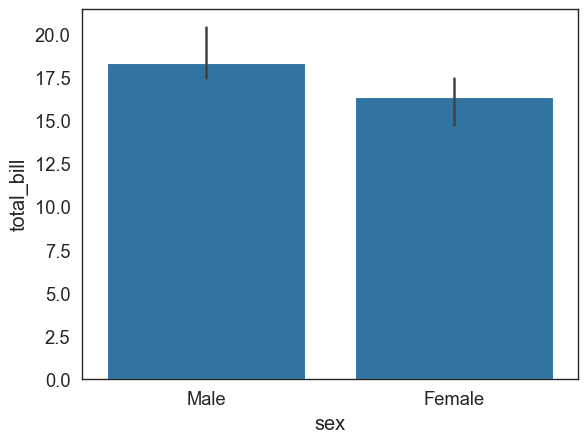

In [13]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator= np.median)
# you could base it on mean, std, count, var, cov etc. or you could define your own function

### Count Plot

<Axes: xlabel='sex', ylabel='count'>

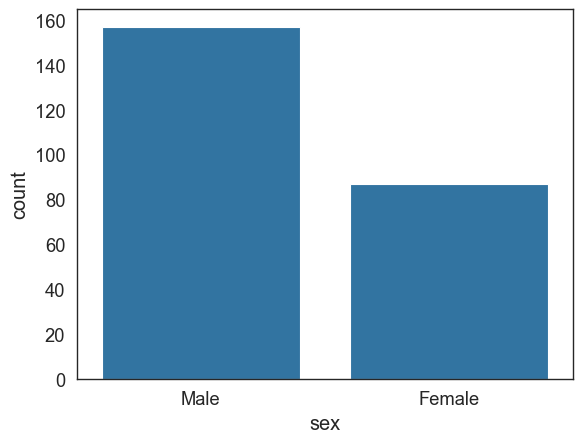

In [14]:
sns.countplot(x='sex', data=tips_df)

### Box Plot

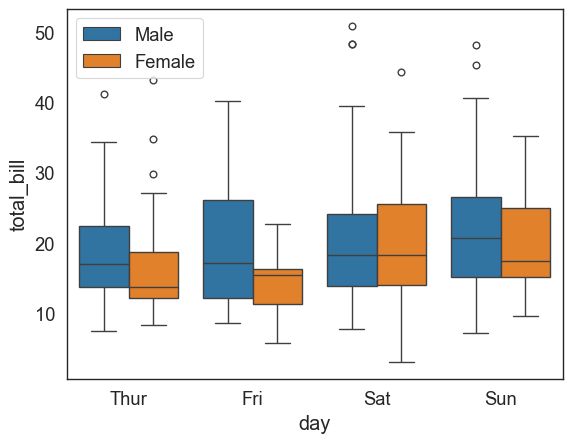

In [15]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

# to move legend
plt.legend(loc=0)

### Violin Plot

<Axes: xlabel='day', ylabel='total_bill'>

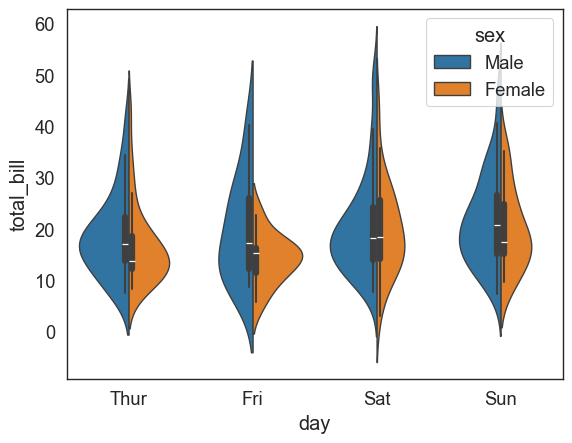

In [16]:
# combination of boxplot and kde plot
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

### Strip Plot

<Axes: xlabel='day', ylabel='total_bill'>

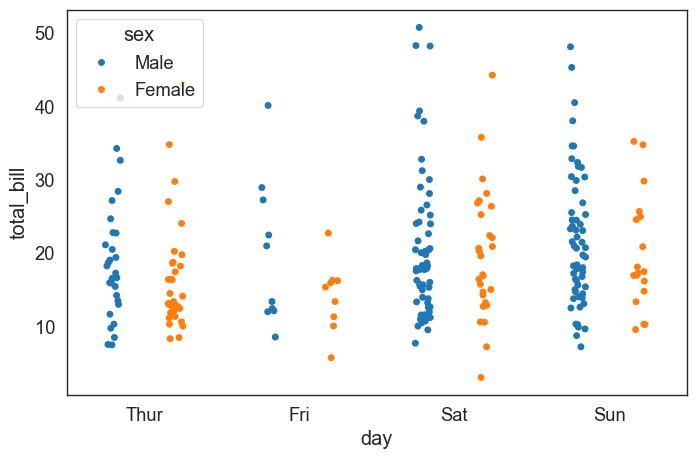

In [17]:
plt.figure(figsize=(8,5))

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)

### Swarm Plot

<Axes: xlabel='day', ylabel='total_bill'>

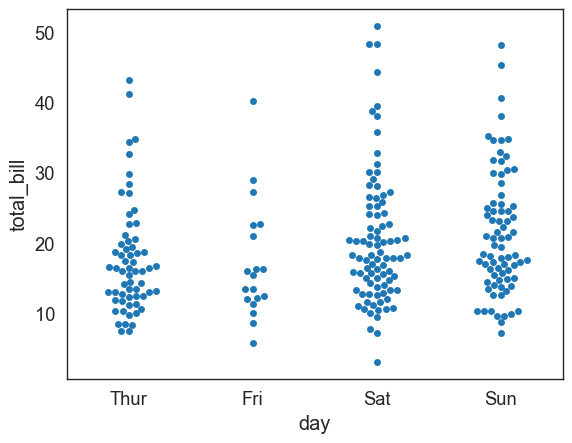

In [18]:
# sns.violinplot(x='day', y='total_bill', data=tips_df)
# sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')
sns.swarmplot(x='day', y='total_bill', data=tips_df)

### Palettes

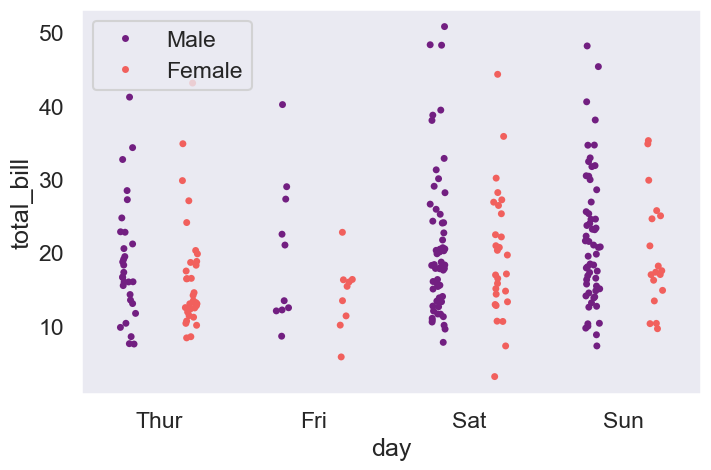

In [19]:
plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='magma', dodge=True)
# you can use other palettes like 'viridis', 'plasma', 'inferno', 'cividis', 'Blues', 'BuGn_r' etc.
plt.legend(loc=0)
# upper right corner: 1, upper left corner: 2, lower left corner:3, lower right corner:4, best:0
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

## Matrix Plots

### Heatmap

<Axes: >

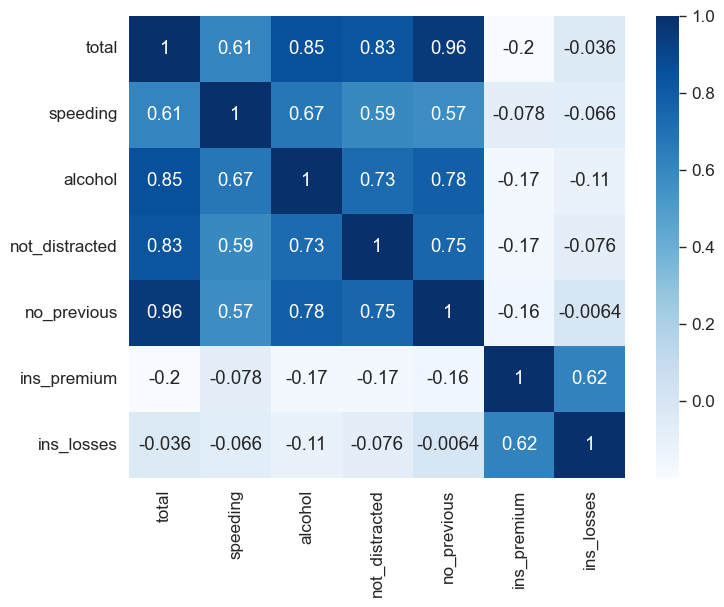

In [20]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# crash_df
crash_mx = crash_df.corr(numeric_only=True)
# crash_mx

# create heatmap
sns.heatmap(crash_mx, annot=True, cmap='Blues')

<Axes: xlabel='year', ylabel='month'>

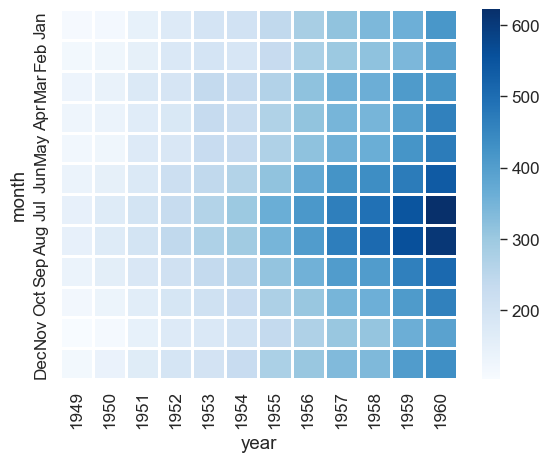

In [21]:
# matrix using pivot table
flights_df = sns.load_dataset('flights')
flights_df = flights_df.pivot_table(index='month', columns='year', values='passengers', observed=False)
sns.heatmap(flights_df, cmap='Blues', linecolor='white', linewidth=1)

## Cluster Map

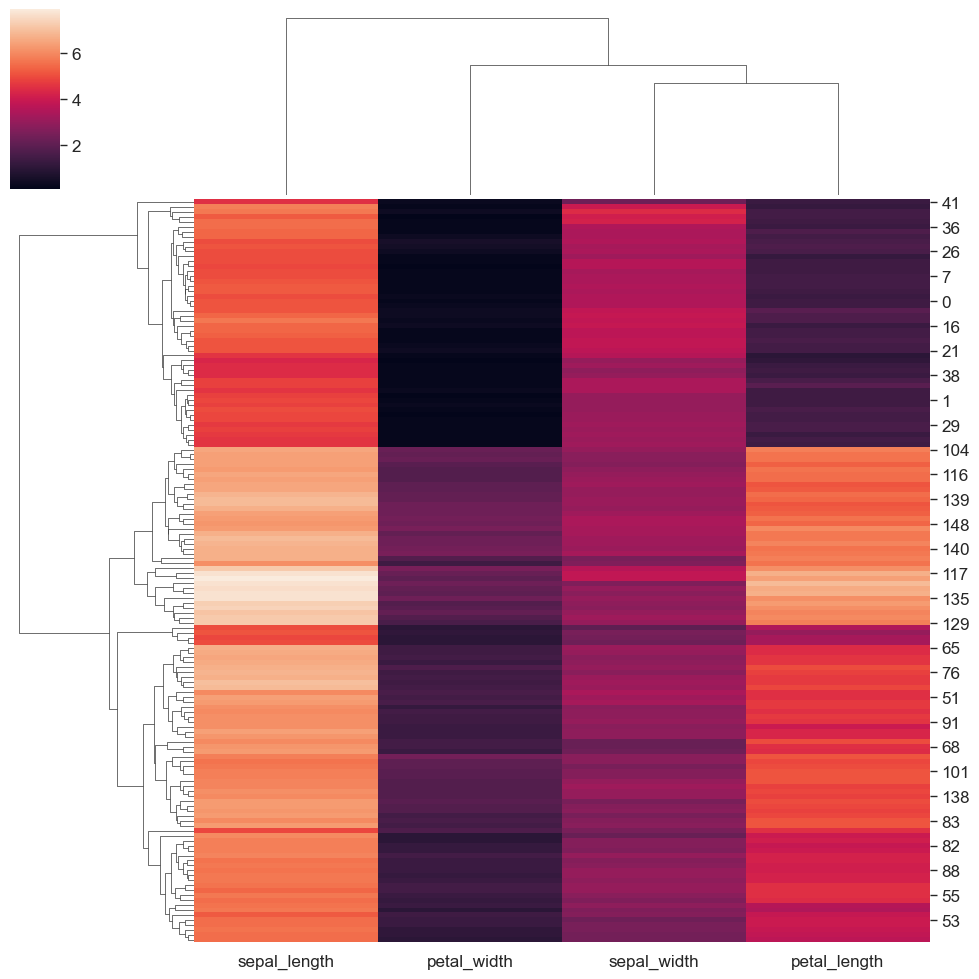

In [22]:
iris = sns.load_dataset('Iris')
species = iris.pop('species')
sns.clustermap(iris)

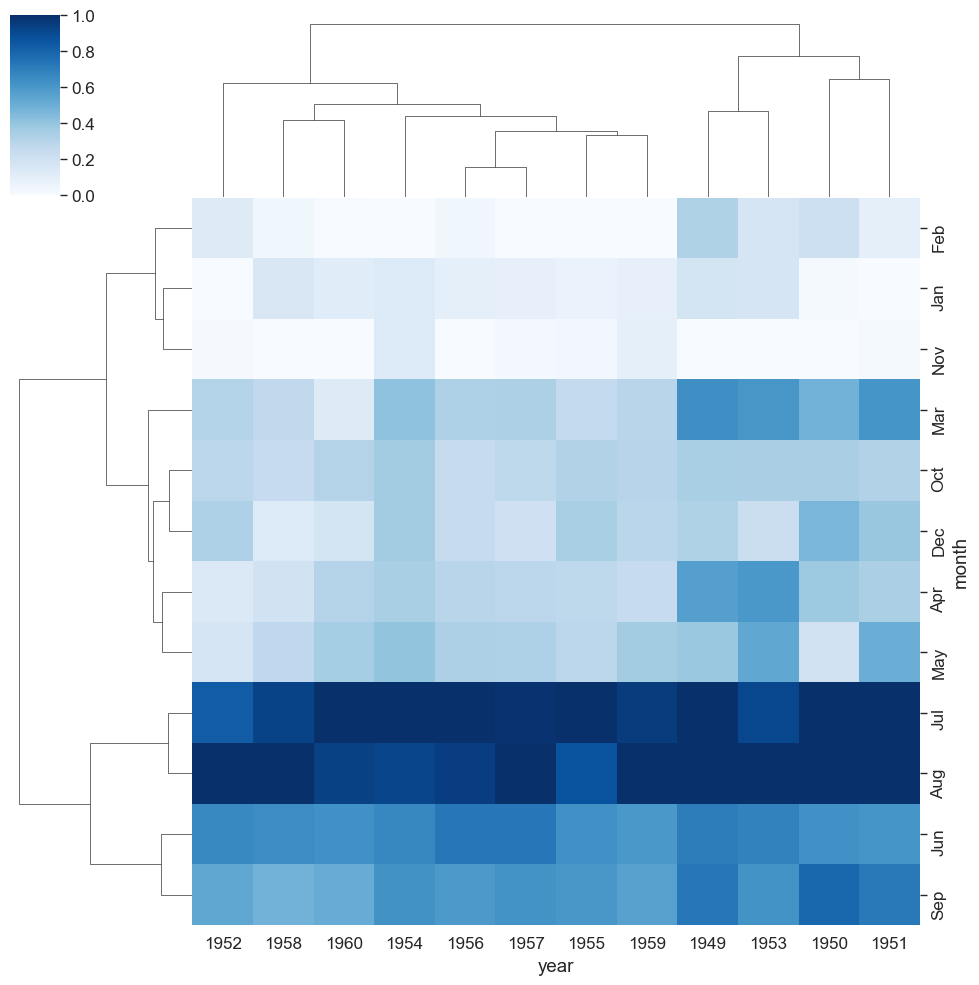

In [23]:
sns.clustermap(flights_df, cmap='Blues', standard_scale=1)

### PairGrid

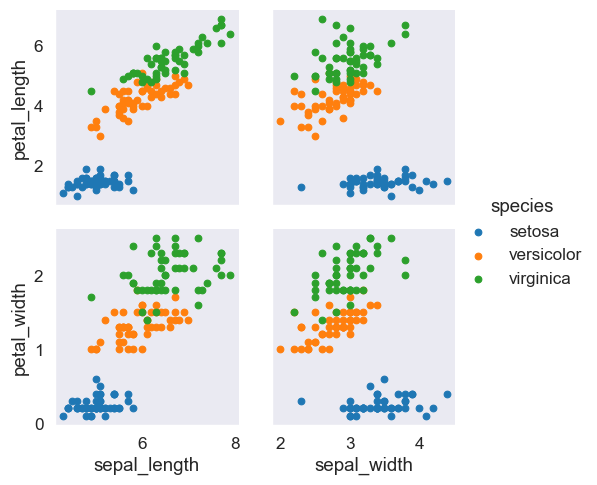

In [24]:
iris = sns.load_dataset('Iris')
# iris_g = sns.PairGrid(iris, hue='species')
# # iris_g.map(plt.scatter)
# iris_g.map_diag(plt.hist)
# # iris_g.map_offdiag(plt.scatter)
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)
iris_g = sns.PairGrid(iris, hue='species', x_vars=['sepal_length', 'sepal_width'], y_vars=['petal_length', 'petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

### Facet Grid

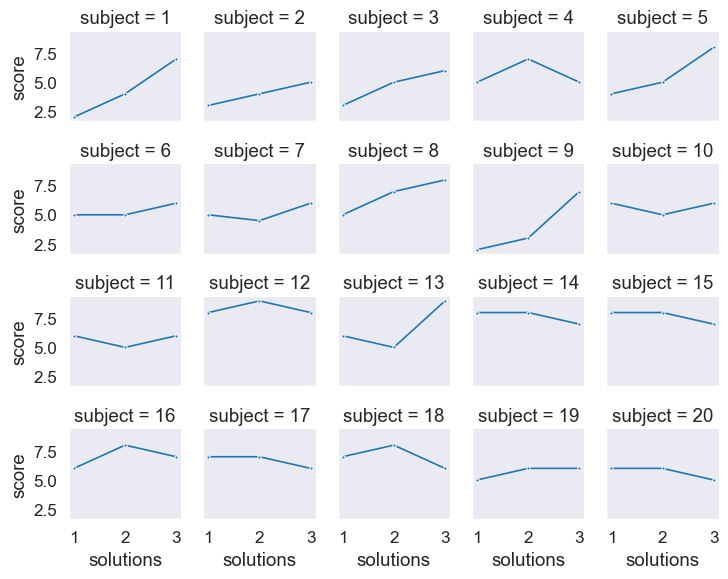

In [25]:
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
# tips_fg.map(sns.histplot, 'total_bill', bins=8)
# tips_fg.map(plt.scatter, 'total_bill', 'tip')
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3, col_order=['Lunch', 'Dinner'], palette='magma')
# tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='black')
# kws = dict(s=50, edgecolor='w', linewidth=1)
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,hue_order=['Yes', 'No'], hue_kws=dict(marker=['^','v']))
# tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(sns.lineplot, 'solutions', 'score', marker='.')

### Regression Plots

In [26]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 800x600 with 0 Axes>

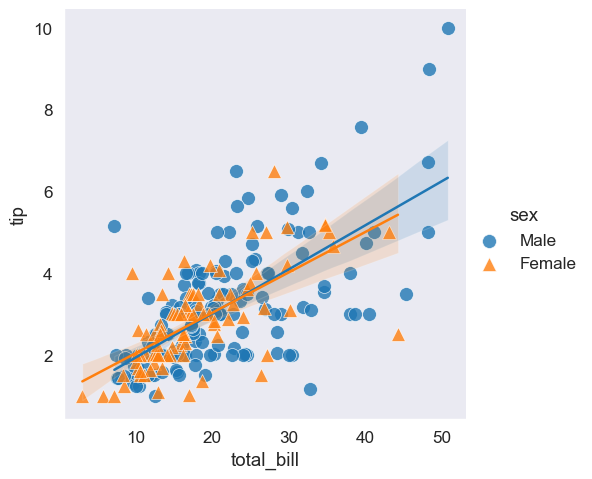

In [27]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(
    data=tips_df,
    x='total_bill',
    y='tip',
    hue='sex',
    markers=['o','^'],
    scatter_kws={'s':100, 'linewidths':0.5, 'edgecolor':'w'},
)

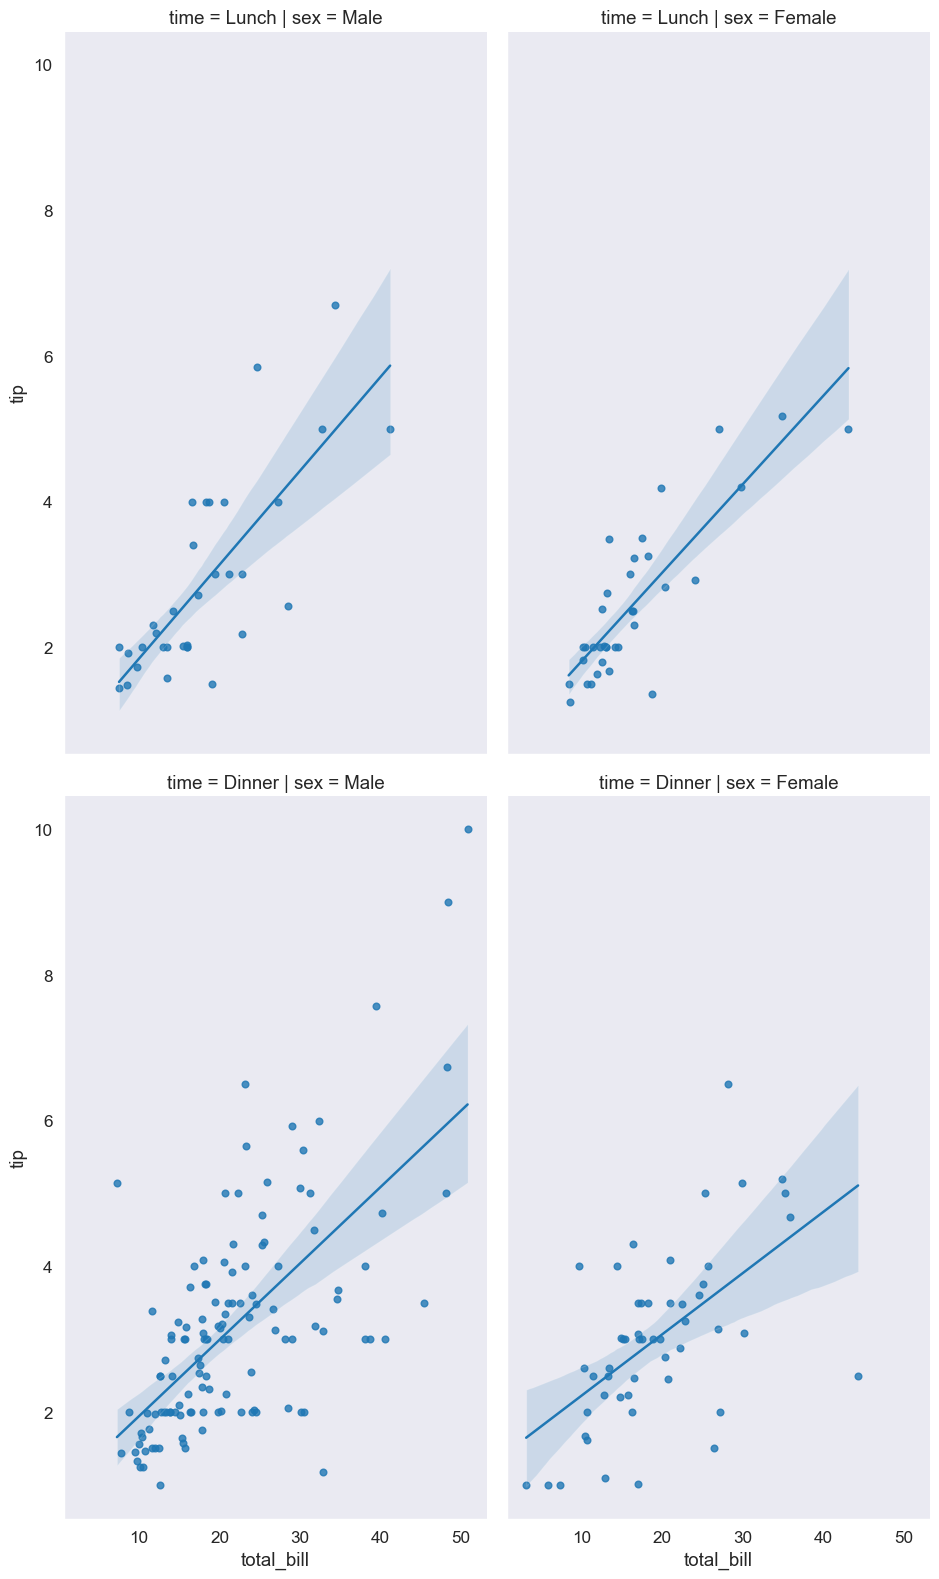

In [29]:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', data=tips_df, col='sex', row='time', height=8, aspect=0.6)